In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize= 1
        self.hiddenLayerSize= 3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)  

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X=X/np.amax(X,axis=0)
y=y/100

In [4]:
NN=Neural_Network()

In [5]:
yH=NN.forward(X)

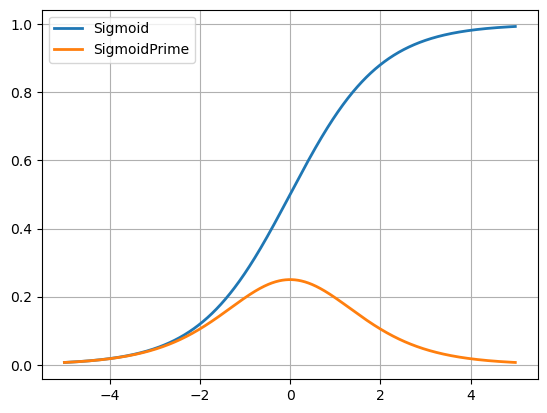

In [6]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)

In [7]:
NN=Neural_Network()

In [8]:
cost1=NN.costFunction(X,y)

In [9]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [10]:
scalar=3
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.01044067] [0.01299636]


In [11]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.01299636] [0.01044067]


# 1.2 Structure of a neural network

A program that minimizes the cost function to a given accuracy set in advance: 

In [12]:
def minimize_cost_sigmoid(scalar, threshold, X, y): 
    costs = []
    cost = cost1
    while cost > threshold:
        cost = NN.costFunction(X, y)
        dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
        NN.W1 = NN.W1-scalar*dJdW1
        NN.W2 = NN.W2-scalar*dJdW2
        costs.append(cost[0])
    plt.plot(costs)
    plt.xlabel("Number of Interations") 
    plt.ylabel("Cost")
    plt.title("Sigmoid Cost vs. Number of Iterations (Scalar = " + str(scalar) + ")")

Plot of the cost vs iteration: 

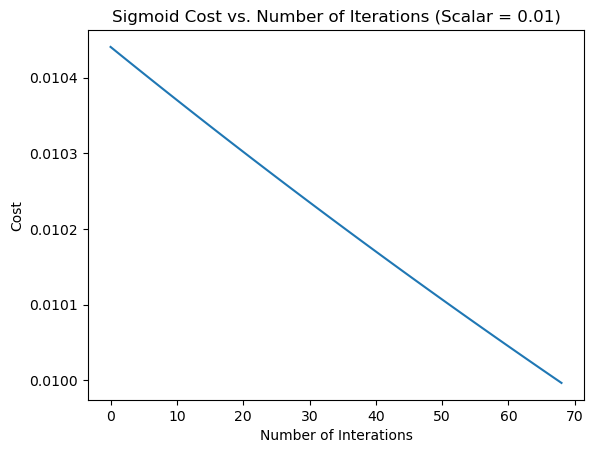

In [13]:
minimize_cost_sigmoid(0.01, 0.01, X, y)

When the scalar is unusually large, the function over shoots and does not minimize the cost correctly. However, according to the graph plotted above, when the scalar is 0.01, the cost hits 0.01, at around 800 iterations. 

# 1. ReLu activation

In [14]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize= 1
        self.hiddenLayerSize= 3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)  

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

[0.08042082] [1.0269202]
[1.0269202] [0.08042082]


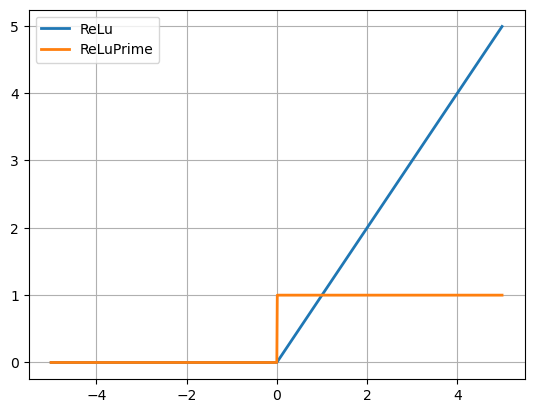

In [15]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

X=X/np.amax(X,axis=0)
y=y/100

NN=Neural_Network()

yH=NN.forward(X)

testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.relu(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['ReLu','ReLuPrime'])
#u=NN.sigmoidPrime(testValues)

NN=Neural_Network()
cost1=NN.costFunction(X,y)
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

scalar=3
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print(cost2,cost3)

Using the ReLu activation function instead of the sigmoid function (no new hidden layer): 

In [16]:
def minimize_cost_reLu(scalar, iterations, X, y): 
    scalar = scalar
    costs = []
    cost = cost1
    for i in range(iterations):
        dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
        NN.W1 = NN.W1-scalar*dJdW1
        NN.W2 = NN.W2-scalar*dJdW2
        cost = NN.costFunction(X, y)
        costs.append(cost[0])
    plt.plot(costs)
    plt.xlabel("Number of Interations") 
    plt.ylabel("Cost")
    plt.title("reLu Cost vs. Number of Iterations (Scalar = " + str(scalar) + ")")

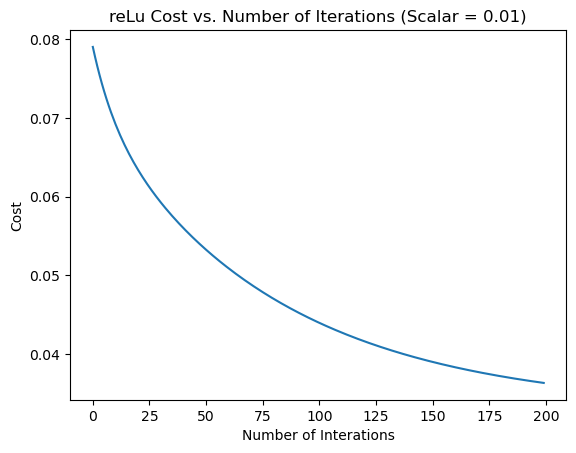

In [17]:
minimize_cost_reLu(0.01, 200, X, y)

When using the ReLu activation function instead of sigmoid and the scalar is still set at 0.01, only about 100 iterations is needed for the cost to reach 0.01, indicating that the ReLu function is more efficient at minimizing.

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.hiddenLayer1Size = 3
        self.outputLayerSize = 1
        
        self.hiddenLayer2Size = 10 # new hidden layer added 

        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayer1Size)
        self.W2=np.random.rand(self.hiddenLayer1Size, self.hiddenLayer2Size)
        
        # adding new hidden layer  
        self.W3=np.random.rand(self.hiddenLayer2Size,self.outputLayerSize)
   
    def forward(self,X):
        #Propagate inputs through network
        self.z1 = np.dot(X,self.W1)
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1,self.W2)
        self.a2 = self.relu(self.z2)
        self.z3 = np.dot(self.a2, self.W3)
        yHat = self.relu(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)

    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
      
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1, W2, and W3
        self.yHat=self.forward(X)
        delta4 = np.multiply(-(y-self.yHat),self.reluPrime(self.z3))
        dJdW3=np.dot(self.a2.T,delta4)
        
        delta3 = np.multiply(-(y-self.yHat),self.reluPrime(self.z2))
        dJdW2=np.dot(self.a1.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.reluPrime(self.z1)
        dJdW1=np.dot(X.T,delta2)
        
        return dJdW1,dJdW2,dJdW3

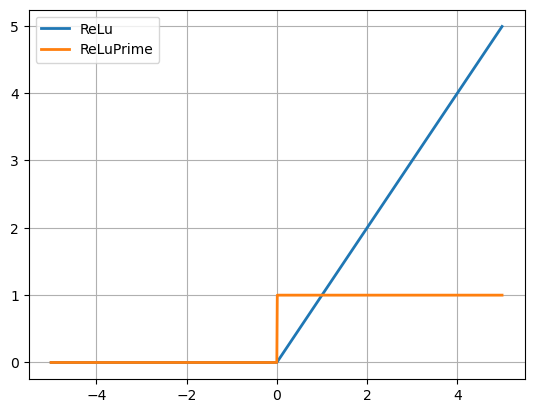

In [19]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

X=X/np.amax(X,axis=0)
y=y/100

NN=Neural_Network()

yH=NN.forward(X)

testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.relu(testValues),linewidth=2)
plt.plot(testValues, NN.reluPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['ReLu','ReLuPrime'])
#u=NN.sigmoidPrime(testValues)

NN=Neural_Network()
cost1=NN.costFunction(X,y)
dJdW1,dJdW2,dJdW3=NN.costFunctionPrime(X,y)

In [20]:
def minimize_cost_reLu_hidden(scalar, iterations, X, y): 
    scalar = scalar
    costs = []
    cost = cost1
    for i in range(iterations):
        dJdW1, dJdW2, dJdW3 = NN.costFunctionPrime(X, y)
        NN.W1 = NN.W1-scalar*dJdW1
        NN.W2 = NN.W2-scalar*dJdW2
        NN.W3 = NN.W3-scalar*dJdW3
        cost = NN.costFunction(X, y)
        costs.append(cost[0])
    plt.plot(costs)
    plt.xlabel("Number of Interations") 
    plt.ylabel("Cost")
    plt.title("reLu Cost vs. Number of Iterations (Scalar = " + str(scalar) + ")")

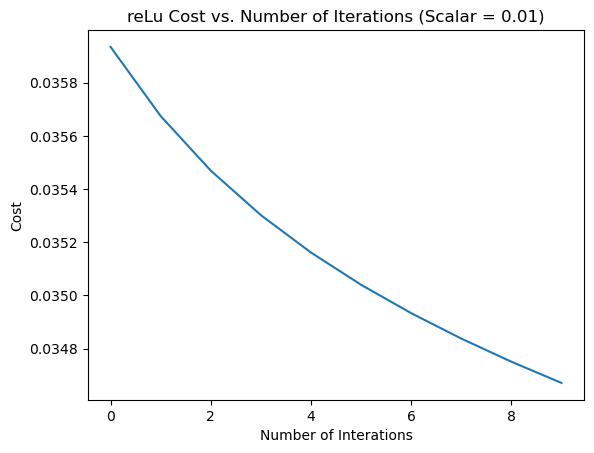

In [21]:
minimize_cost_reLu_hidden(0.01, 10, X, y)

Furthermore, when the ReLu function is used AND a hidden layer set at 10 units is added, the minimization function is the most efficient as indicated by how only about 8 iterations are needed for the cost to hit 0.01 with the scalar still being set at 0.01.